In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [13]:
# 데이터 불러오기
train = pd.read_csv('dataset/pose-record.csv') # 모델 학습 파일
#test = pd.read_csv('/경로/test.csv') # 모델 시험지 파일
#submission = pd.read_csv('/경로/submission.csv') # 답안지 파일

In [14]:
train

,time,headx,heady,neckx,necky,rshoulderx,rshouldery,relbowx,relbowy,rwristx,...,rhipx,rhipy,rkneex,rkneey,lhipx,lhipy,lkneex,lkneey,chestx,chesty
0,0.1,288,96,288,176,256,192,224,256,208,...,272,320,256,432,320,320,320,432,288,256
1,0.2,288,96,288,176,256,192,224,256,208,...,256,320,256,432,320,320,320,432,288,256
2,0.3,288,96,304,176,256,192,224,256,208,...,256,320,256,432,320,320,320,432,288,256
3,0.4,288,96,304,176,256,192,224,256,208,...,256,320,256,432,320,320,320,432,288,256
4,0.5,288,96,304,176,256,192,224,256,208,...,256,320,256,432,320,320,320,432,288,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,29.6,256,96,256,176,208,192,160,224,96,...,224,320,224,432,272,320,304,432,256,256
296,29.7,256,96,256,176,224,208,176,240,112,...,224,336,224,448,288,320,304,432,256,256
297,29.8,256,96,272,176,240,208,208,256,144,...,240,320,224,432,288,320,304,432,272,256
298,29.9,256,96,272,176,240,208,224,272,176,...,256,320,240,432,304,320,320,432,272,256


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         300 non-null    float64
 1   headx        300 non-null    int64  
 2    heady       300 non-null    int64  
 3    neckx       300 non-null    int64  
 4    necky       300 non-null    int64  
 5    rshoulderx  300 non-null    int64  
 6    rshouldery  300 non-null    int64  
 7    relbowx     300 non-null    int64  
 8    relbowy     300 non-null    int64  
 9    rwristx     300 non-null    int64  
 10   rwristy     300 non-null    int64  
 11   lshoulderx  300 non-null    int64  
 12   lshouldery  300 non-null    int64  
 13   lelbowx     300 non-null    int64  
 14   lelbowy     300 non-null    int64  
 15   lwristx     300 non-null    int64  
 16   lwristy     300 non-null    int64  
 17   rhipx       300 non-null    int64  
 18   rhipy       300 non-null    int64  
 19   rkneex 

## 입력/결과를 분리

In [19]:
'''
import csvManager
import random

csvManager.clear_csv_file('dataset/movement.csv')
csvManager.clear_csv_file('dataset/animate.csv')

for frameN in range(19):
    tmp = []
    delta = random.choice((6, 8, 10))
    tmp.append(round(train.iloc[frameN + delta]['time'] - train.iloc[frameN]['time'], 1))
    tmp.append(train.iloc[frameN + delta]['headx'] - train.iloc[frameN]['headx'])
    tmp.append(train.iloc[frameN + delta]['heady'] - train.iloc[frameN]['heady'])
    tmp.append(train.iloc[frameN + delta]['neckx'] - train.iloc[frameN]['neckx'])
    tmp.append(train.iloc[frameN + delta]['necky'] - train.iloc[frameN]['necky'])
    tmp.append(train.iloc[frameN + delta]['rshoulderx'] - train.iloc[frameN]['rshoulderx'])
    tmp.append(train.iloc[frameN + delta]['rshouldery'] - train.iloc[frameN]['rshouldery'])
    tmp.append(train.iloc[frameN + delta]['relbowx'] - train.iloc[frameN]['relbowx'])
    tmp.append(train.iloc[frameN + delta]['relbowy'] - train.iloc[frameN]['relbowy'])
    tmp.append(train.iloc[frameN + delta]['rwristx'] - train.iloc[frameN]['rwristx'])
    tmp.append(train.iloc[frameN + delta]['rwristy'] - train.iloc[frameN]['rwristy'])
    tmp.append(train.iloc[frameN + delta]['lshoulderx'] - train.iloc[frameN]['lshoulderx'])
    tmp.append(train.iloc[frameN + delta]['lshouldery'] - train.iloc[frameN]['lshouldery'])
    tmp.append(train.iloc[frameN + delta]['lelbowx'] - train.iloc[frameN]['lelbowx'])
    tmp.append(train.iloc[frameN + delta]['lelbowy'] - train.iloc[frameN]['lelbowy'])
    tmp.append(train.iloc[frameN + delta]['lwristx'] - train.iloc[frameN]['lwristx'])
    tmp.append(train.iloc[frameN + delta]['lwristy'] - train.iloc[frameN]['lwristy'])
    tmp.append(train.iloc[frameN + delta]['rhipx'] - train.iloc[frameN]['rhipx'])
    tmp.append(train.iloc[frameN + delta]['rhipy'] - train.iloc[frameN]['rhipy'])
    tmp.append(train.iloc[frameN + delta]['rkneex'] - train.iloc[frameN]['rkneex'])
    tmp.append(train.iloc[frameN + delta]['rkneey'] - train.iloc[frameN]['rkneey'])
    tmp.append(train.iloc[frameN + delta]['lhipx'] - train.iloc[frameN]['lhipx'])
    tmp.append(train.iloc[frameN + delta]['lhipy'] - train.iloc[frameN]['lhipy'])
    tmp.append(train.iloc[frameN + delta]['lkneex'] - train.iloc[frameN]['lkneex'])
    tmp.append(train.iloc[frameN + delta]['lkneey'] - train.iloc[frameN]['lkneey'])
    tmp.append(train.iloc[frameN + delta]['chestx'] - train.iloc[frameN]['chestx'])
    tmp.append(train.iloc[frameN + delta]['chesty'] - train.iloc[frameN]['chesty'])
    csvManager.add_line(tmp, 'dataset/movement.csv')

    tmp = []
    delta = int(delta / 2)
    tmp.append(round(train.iloc[frameN + delta]['time'] - train.iloc[frameN]['time'], 1))
    tmp.append(train.iloc[frameN + delta]['headx'] - train.iloc[frameN]['headx'])
    tmp.append(train.iloc[frameN + delta]['heady'] - train.iloc[frameN]['heady'])
    tmp.append(train.iloc[frameN + delta]['neckx'] - train.iloc[frameN]['neckx'])
    tmp.append(train.iloc[frameN + delta]['necky'] - train.iloc[frameN]['necky'])
    tmp.append(train.iloc[frameN + delta]['rshoulderx'] - train.iloc[frameN]['rshoulderx'])
    tmp.append(train.iloc[frameN + delta]['rshouldery'] - train.iloc[frameN]['rshouldery'])
    tmp.append(train.iloc[frameN + delta]['relbowx'] - train.iloc[frameN]['relbowx'])
    tmp.append(train.iloc[frameN + delta]['relbowy'] - train.iloc[frameN]['relbowy'])
    tmp.append(train.iloc[frameN + delta]['rwristx'] - train.iloc[frameN]['rwristx'])
    tmp.append(train.iloc[frameN + delta]['rwristy'] - train.iloc[frameN]['rwristy'])
    tmp.append(train.iloc[frameN + delta]['lshoulderx'] - train.iloc[frameN]['lshoulderx'])
    tmp.append(train.iloc[frameN + delta]['lshouldery'] - train.iloc[frameN]['lshouldery'])
    tmp.append(train.iloc[frameN + delta]['lelbowx'] - train.iloc[frameN]['lelbowx'])
    tmp.append(train.iloc[frameN + delta]['lelbowy'] - train.iloc[frameN]['lelbowy'])
    tmp.append(train.iloc[frameN + delta]['lwristx'] - train.iloc[frameN]['lwristx'])
    tmp.append(train.iloc[frameN + delta]['lwristy'] - train.iloc[frameN]['lwristy'])
    tmp.append(train.iloc[frameN + delta]['rhipx'] - train.iloc[frameN]['rhipx'])
    tmp.append(train.iloc[frameN + delta]['rhipy'] - train.iloc[frameN]['rhipy'])
    tmp.append(train.iloc[frameN + delta]['rkneex'] - train.iloc[frameN]['rkneex'])
    tmp.append(train.iloc[frameN + delta]['rkneey'] - train.iloc[frameN]['rkneey'])
    tmp.append(train.iloc[frameN + delta]['lhipx'] - train.iloc[frameN]['lhipx'])
    tmp.append(train.iloc[frameN + delta]['lhipy'] - train.iloc[frameN]['lhipy'])
    tmp.append(train.iloc[frameN + delta]['lkneex'] - train.iloc[frameN]['lkneex'])
    tmp.append(train.iloc[frameN + delta]['lkneey'] - train.iloc[frameN]['lkneey'])
    tmp.append(train.iloc[frameN + delta]['chestx'] - train.iloc[frameN]['chestx'])
    tmp.append(train.iloc[frameN + delta]['chesty'] - train.iloc[frameN]['chesty'])
    csvManager.add_line(tmp, 'dataset/animate.csv')
    '''

dataset/movement.csv 내용을 대체합니다.
dataset/animate.csv 내용을 대체합니다.


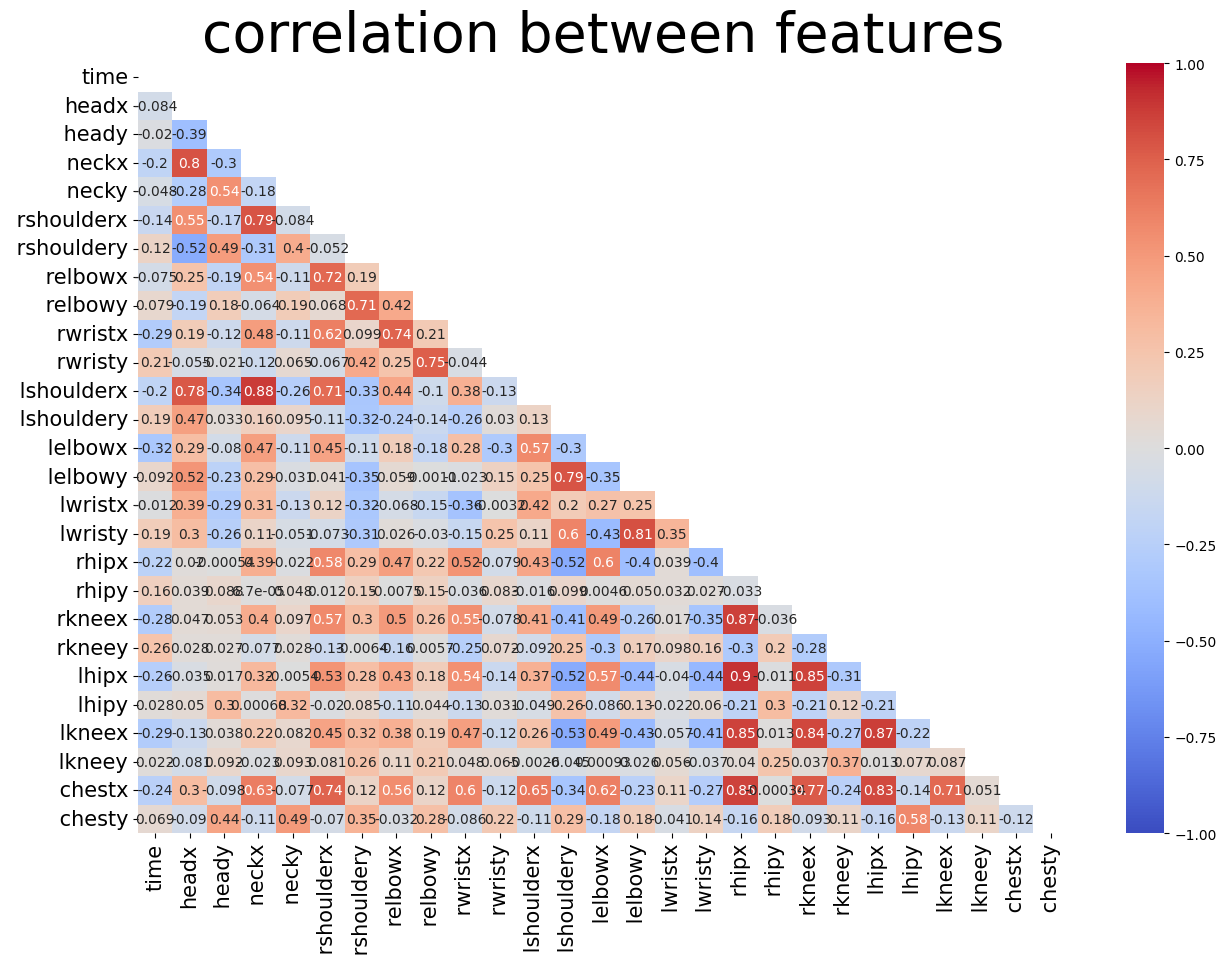

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#상관관계 분석도
plt.figure(figsize=(15,10))
heat_table = train.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm', vmin=-1, vmax=1)
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=90)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()